In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/folder'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/test.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_csv("/content/folder/train.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
print("Shape of dataset ", data.shape)
print("Columns ", data.columns)

Shape of dataset  (20800, 5)
Columns  Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [ ]:
txt_len = data.text.str.split().str.len()
txt_len.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

In [ ]:
title_len = data.title.str.split().str.len()
title_len.describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

<AxesSubplot:xlabel='label', ylabel='count'>

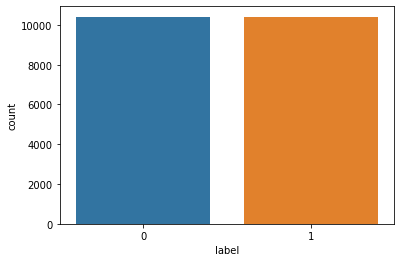

In [ ]:
sns.countplot(x='label', data= data)

In [ ]:
print(data.label.value_counts())
print()
print(round(data.label.value_counts(normalize=True),2)*100)

1    10413
0    10387
Name: label, dtype: int64

1    50.0
0    50.0
Name: label, dtype: float64


In [ ]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
column_n = ['id', 'title', 'author', 'text', 'label']
remove_c = ['id','author']
categorical_features = []
target_col = ['label']
text_f = ['title', 'text']

In [ ]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

def remove_unused_c(df, column_n=remove_c):
    df = df.drop(column_n, axis=1)
    return df

def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(),col] = "None"
    return feature_df

def clean_dataset(df):
    df = remove_unused_c(df)
    df = null_process(df)
    
    return df

def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')
    text = str(text).replace(r'[^\.\w\s]', ' ')
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [ ]:
df = clean_dataset(data)
df['text'] = df.text.apply(nltk_preprocess)
df['title'] = df.title.apply(nltk_preprocess)

In [ ]:
df.head()

,title,text,label
0,house dem aide didnt even see comeys letter ja...,house dem aide didnt even see comeys letter ja...,1
1,flynn hillary clinton big woman campus breitbart,ever get feeling life circle roundabout rather...,0
2,truth might get fired,truth might get fired october 29 2016 tension ...,1
3,15 civilian killed single u airstrike identified,video 15 civilian killed single u airstrike id...,1
4,iranian woman jailed fictional unpublished sto...,print iranian woman sentenced six year prison ...,1


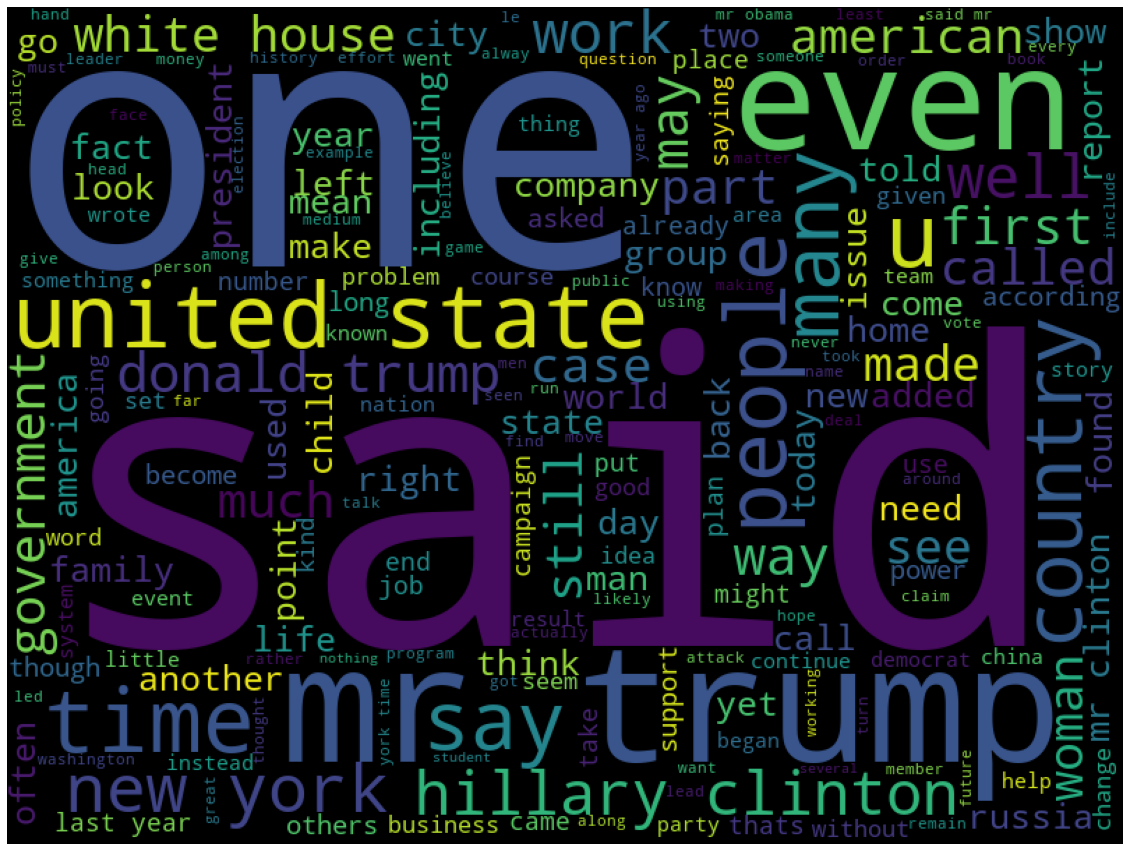

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(background_color='black', width=800, height=600)
text_cloud = wordcloud.generate(" ".join(df['text']))
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

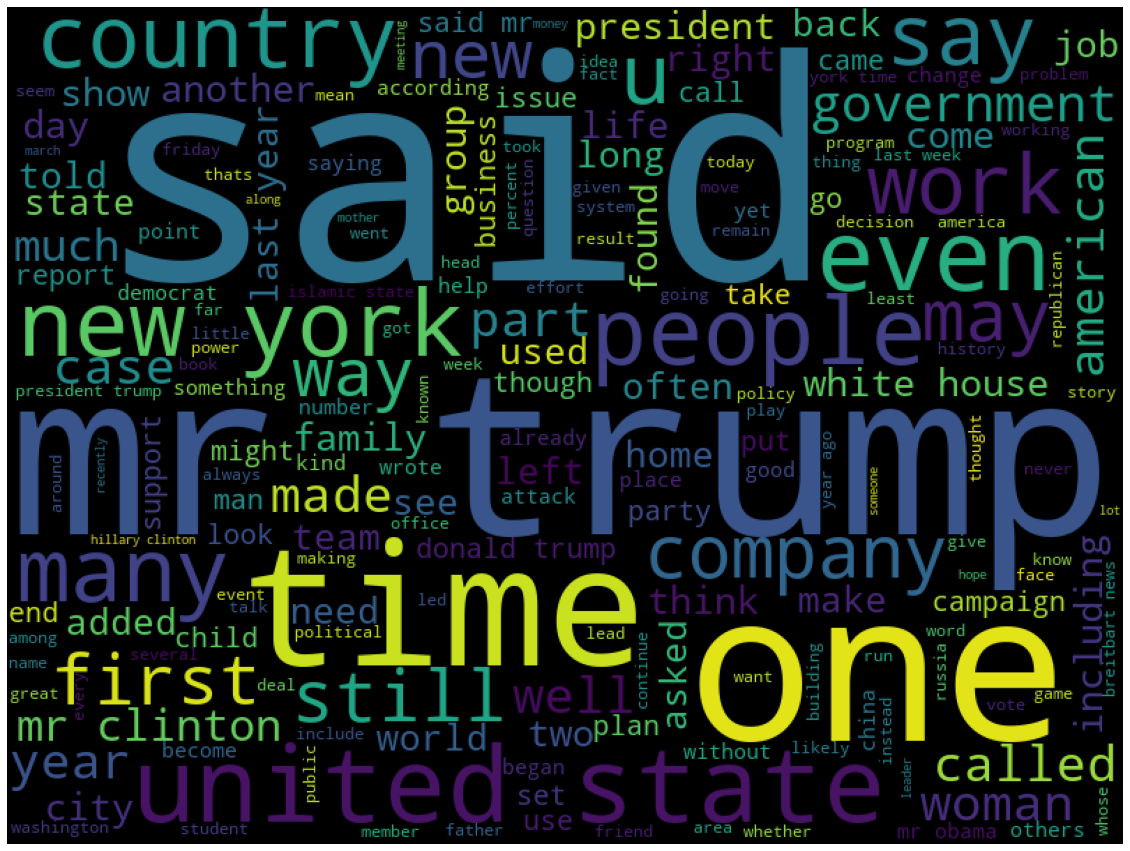

In [ ]:
# reliable news (0)
reliable_news = " ".join(df[df['label']==0]['text'])
wc = wordcloud.generate(reliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

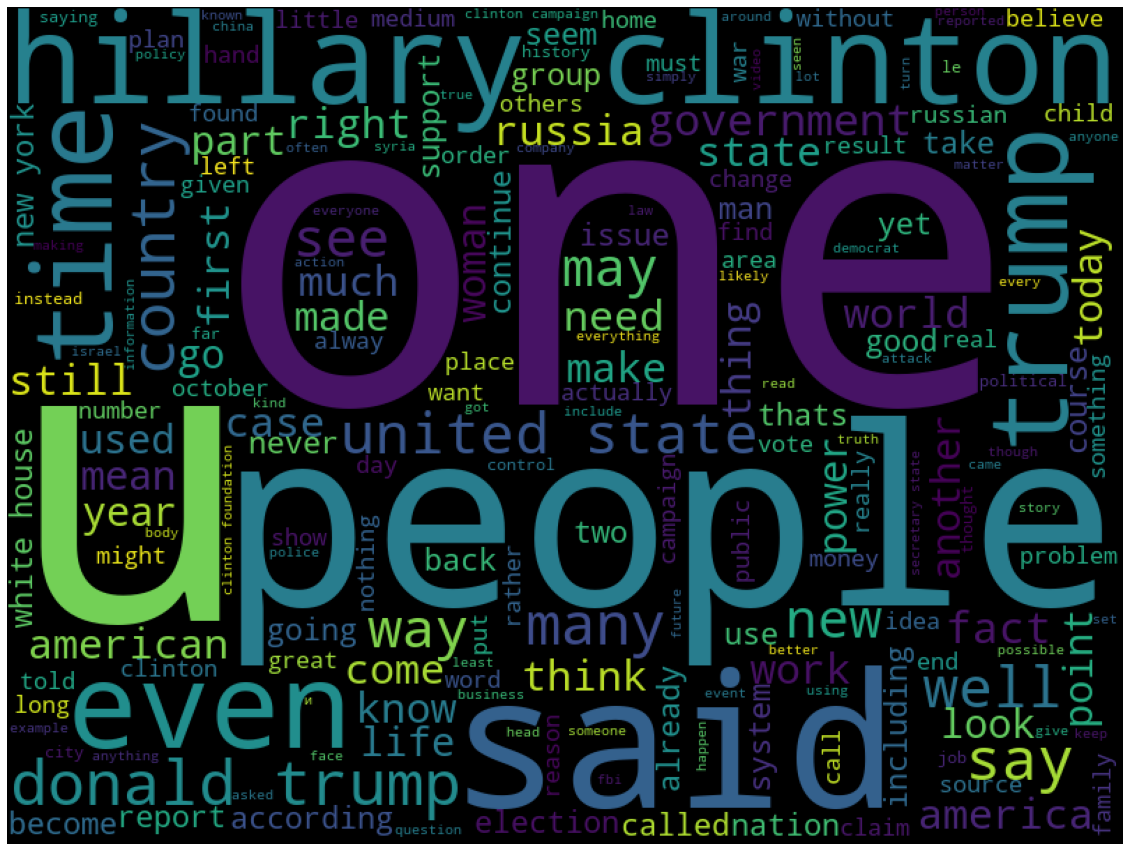

In [ ]:
# unreliable news (1)
unreliable_news  = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(unreliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

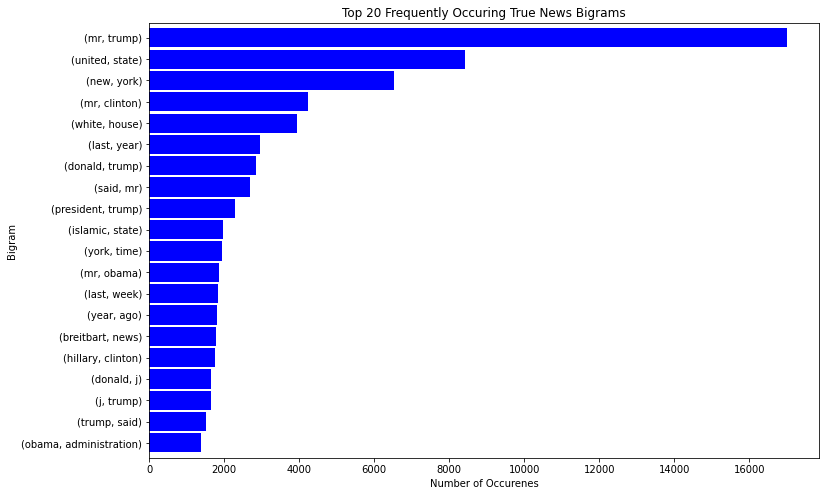

In [ ]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurenes", n =2):
    true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
    true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
    
plot_top_ngrams(reliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=2)

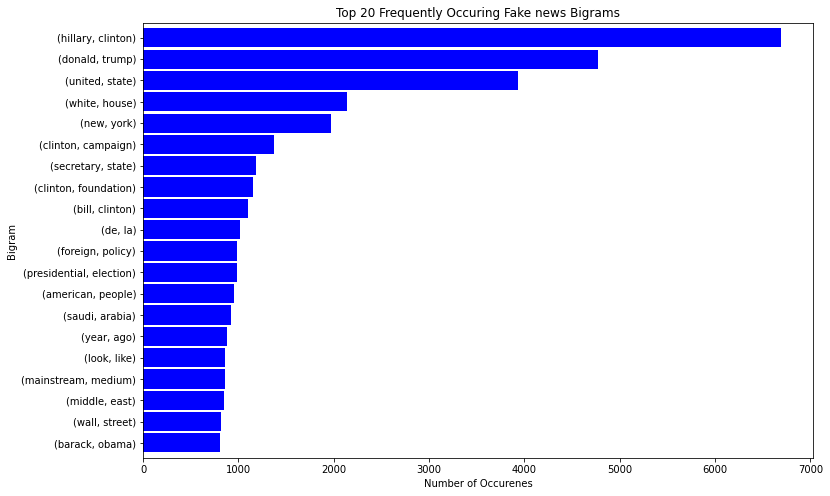

In [ ]:
plot_top_ngrams(unreliable_news, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

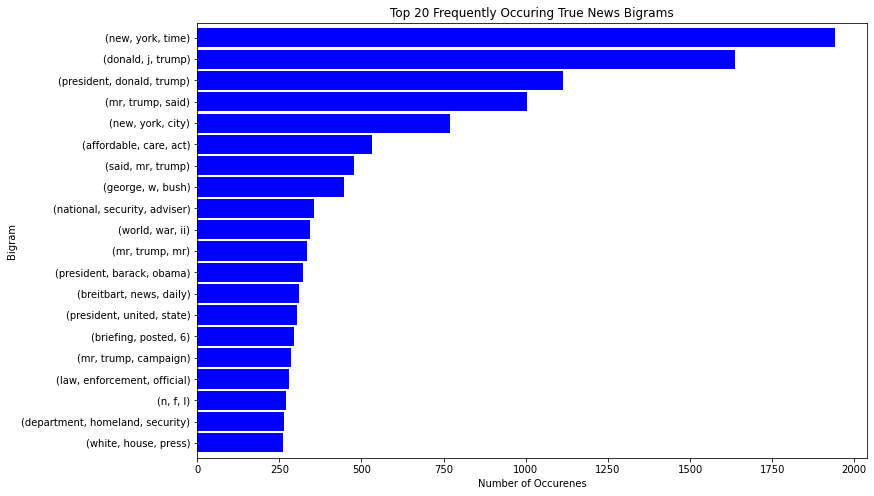

In [ ]:
# Trigram
plot_top_ngrams(reliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=3)

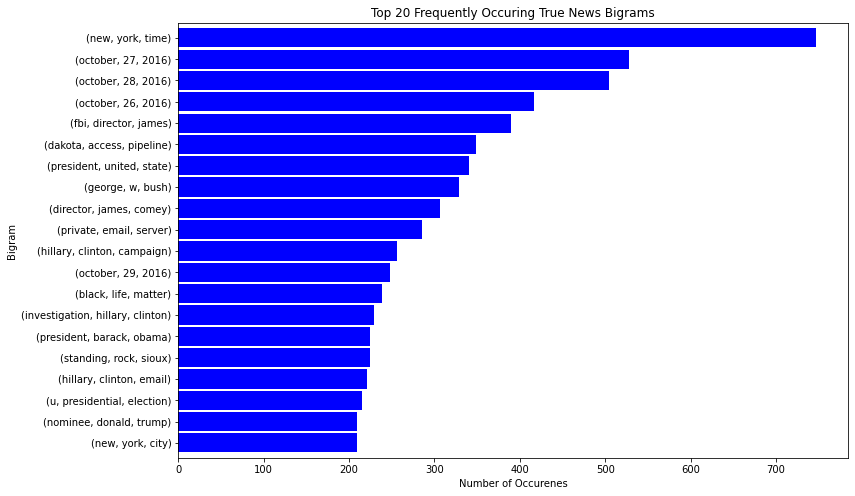

In [ ]:
plot_top_ngrams(unreliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=3)

In [ ]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import random

In [ ]:
def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(123)

In [ ]:
model_name = "bert-base-uncased"
max_length= 512

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
## Data Preparation
data = data[data['text'].notna()]
data = data[data['title'].notna()]
data = data[data['author'].notna()]

In [ ]:
def prepare_data(df, test_size=0.2, include_title=True, include_author=True):
    texts = []
    labels = []
    
    for i in range(len(df)):
        text = df['text'].iloc[i]
        label = df['label'].iloc[i]
        
        if include_title:
            text = df['title'].iloc[i] + " - " + text
        if include_author:
            text = df['author'].iloc[i] + " - " + text
        
        if text and label in [0,1]:
            texts.append(text)
            labels.append(label)
            
    return train_test_split(texts, labels, test_size=test_size)

train_texts, valid_texts, train_labels, valid_labels = prepare_data(data)

In [ ]:
print(len(train_texts), len(train_labels))
print(len(valid_texts), len(valid_labels))

14628 14628
3657 3657


In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

In [ ]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor([self.labels[idx]])
        return item
    
    def __len__(self):
        return len(self.labels)
    
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [ ]:
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from sklearn.metrics import accuracy_score

def computer_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    
    return {'accuracy':acc,}

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=1,              
    per_device_train_batch_size=10,  
    per_device_eval_batch_size=20,   
    warmup_steps=100,         
    logging_dir='./logs',
    load_best_model_at_end=True,
    logging_steps=200,
    save_steps=200,
    evaluation_strategy="steps",     
)

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=computer_metrics,
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
trainer.train()

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 14628
  Num Epochs = 1
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 1463
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Step,Training Loss,Validation Loss,Accuracy
200,0.282900,0.027186,0.993984
400,0.048900,0.020441,0.996719
600,0.028400,0.010539,0.998086
800,0.010400,0.010967,0.998359
1000,0.003500,0.010861,0.998633
1200,0.018100,0.011169,0.998086
1400,0.009000,0.004027,0.998906


***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-200
Configuration saved in ./results/checkpoint-200/config.json
Model weights saved in ./results/checkpoint-200/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-400
Configuration saved in ./results/checkpoint-400/config.json
Model weights saved in ./results/checkpoint-400/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-600
Configuration saved in ./results/checkpoint-600/config.json
Model weights saved in ./results/checkpoint-600/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-800
Configuration saved in ./results/checkpoint-800/config.json
Model weights saved in ./results/checkpoint-800/pytorch_model.bin
****

TrainOutput(global_step=1463, training_loss=0.05516366250125496, metrics={'train_runtime': 1692.3158, 'train_samples_per_second': 8.644, 'train_steps_per_second': 0.864, 'total_flos': 3848788517806080.0, 'train_loss': 0.05516366250125496, 'epoch': 1.0})

In [ ]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20


{'eval_loss': 0.004026681184768677,
 'eval_accuracy': 0.9989062072737216,
 'eval_runtime': 66.4893,
 'eval_samples_per_second': 55.001,
 'eval_steps_per_second': 2.752,
 'epoch': 1.0}

In [ ]:
model_path = "fake-news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in fake-news-bert-base-uncased/config.json
Model weights saved in fake-news-bert-base-uncased/pytorch_model.bin
tokenizer config file saved in fake-news-bert-base-uncased/tokenizer_config.json
Special tokens file saved in fake-news-bert-base-uncased/special_tokens_map.json


('fake-news-bert-base-uncased/tokenizer_config.json',
 'fake-news-bert-base-uncased/special_tokens_map.json',
 'fake-news-bert-base-uncased/vocab.txt',
 'fake-news-bert-base-uncased/added_tokens.json',
 'fake-news-bert-base-uncased/tokenizer.json')

In [ ]:
def get_prediction(text, convert_to_label=False):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
        return d[int(probs.argmax())]
    else:
        return int(probs.argmax())

In [ ]:
real_news = """
Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times",Daniel Victor,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. <SNIPPED>
"""

get_prediction(real_news, convert_to_label=True)

'reliable'

In [ ]:
test_df = pd.read_csv("test.csv")
new_df = test_df.copy()
new_df["new_text"] = new_df["author"].astype(str) + " : " + new_df["title"].astype(str) + " - " + new_df["text"].astype(str)
new_df["label"] = new_df["new_text"].apply(get_prediction)
final_df = new_df[["id", "label"]]
final_df.to_csv("submit_final.csv", index=False)